# Process identification of soil resustance and soil matric parametrisations in CLM

script received from Sean Swenson

In [8]:
#!/usr/bin/env python
# coding: utf-8

import sys 
import string 
import subprocess
import argparse
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
from scipy import interpolate
from matplotlib import cm

bsw,phi,psi
2.91 0.3882 67.92036326171842
12.450000000000001 0.4386 226.98648518838212
6.09 0.4134 124.16523075924106
5.772 0.4323 195.2090734043304
 
d_vs_o.png  created


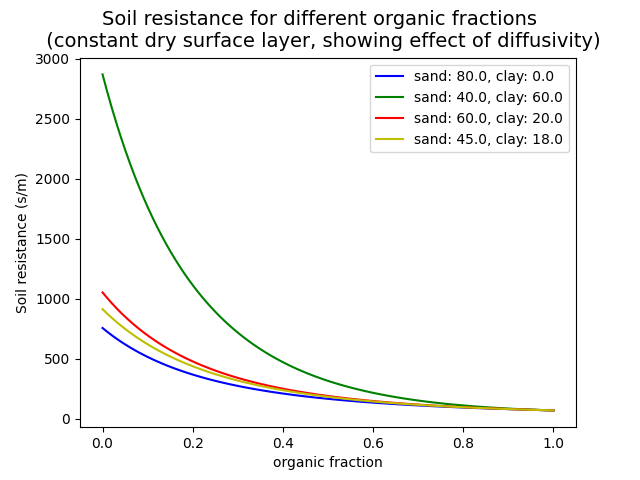

In [9]:

ncol = 1
nrow = 1
fig1, ax1 = plt.subplots(nrow,ncol)
fig1.subplots_adjust(hspace=0.4,wspace=0.2)
fax = fig1.get_axes()

fig1.suptitle('Soil resistance for different organic fractions\n (constant dry surface layer, showing effect of diffusivity)',fontsize=14)

sand1 = 80.
clay1 = 0.

clay2 = 60.
sand2 = 100. - clay2

clay3 = 20.
sand3 = 60.  

clay4 = 18.
sand4 = 45.

bsw1 = 2.91+0.159*clay1 # Bi mineral
phi1 = 0.489-0.00126*sand1 # porosity (theta_sat) mineral
psi1 = 10.*10**(1.88-0.0131*sand1) # saturated soil matric potential of mineral soils

bsw2 = 2.91+0.159*clay2
phi2 = 0.489-0.00126*sand2
psi2 = 10.*10**(1.88-0.0131*sand2)

bsw3 = 2.91+0.159*clay3
phi3 = 0.489-0.00126*sand3
psi3 = 10.*10**(1.88-0.0131*sand3)

bsw4 = 2.91+0.159*clay4
phi4 = 0.489-0.00126*sand4
psi4 = 10.*10**(1.88-0.0131*sand4)


print('bsw,phi,psi')
print(bsw1,phi1,psi1)
print(bsw2,phi2,psi2)
print(bsw3,phi3,psi3)
print(bsw4,phi4,psi4)
print(' ')

#  ----------  first plot -------------------------

xmax = 0.5
xtitl  = 'organic fraction'

xr = [0,xmax]

ymax = 15.
ymin = 0.
ymax2 = 5.e3
ymin2 = 1.e1
ytitl  = 'Soil resistance (s/m)'

fax[0].set_xlabel(xtitl)
fax[0].set_ylabel(ytitl)

km = 100
om_frac = np.linspace(0,1,km)

om_watsat         = 0.93 # theta_sat 
om_b              = 2.7
om_sucsat         = 10.3 # saturated soil matric potential of organic soil

phiarr = [phi1,phi2,phi3,phi4]
psiarr = [psi1,psi2,psi3,psi4]
bswarr = [bsw1,bsw2,bsw3,bsw4]

cols = ['b','g','r','y']
for n in range(len(phiarr)):
    phi =  ( (1. - om_frac) * phiarr[n] + om_watsat*om_frac )
    bsw =  ( (1.-om_frac) * bswarr[n] + om_frac*om_b )
    psi =  ( (1.-om_frac) * psiarr[n] + om_sucsat*om_frac )

    # convert to m
    if 1==2:
        psi = psi*1.e-3

    #  calculate field capacity and wilting point
    fc = phi1*(psi/3.4)**(1./bsw)

    psi_wp = 200.e3 #[mm]
    wp = phi1*(psi/psi_wp)**(1./bsw)

    #  "air-dry", dingman p. 237
    psi_air = 1.e4 * 1e3 #[mm]
    air = phi*(psi/psi_air)**(1./bsw)

    eps = phi-air

    tau = eps**2*(eps/phi)**(3./bsw)   

    tc = 15.
    t0 = 273.15+tc
    d0 = 2.26e-5*(t0/273.15)**1.75

    dg = tau*d0

    r = 1/(dg*eps*1.e3) + 20.
    fax[0].plot(om_frac,r,c=cols[n])
    fax[0].legend(['sand: '+str(sand1)+', clay: '+str(clay1), 'sand: '+str(sand2)+', clay: '+str(clay2), 'sand: '+str(sand3)+', clay: '+str(clay3), 'sand: '+str(sand4)+', clay: '+str(clay4)])


pngfile = 'd_vs_o.png'
plt.savefig(pngfile,format='png')
print(pngfile,' created')



2.91 0.3882 67.92036326171842
9.27 0.4638 414.95404263436285
6.09 0.4134 124.16523075924106
5.772 0.4323 195.2090734043304
 
mp_vs_o.png  created


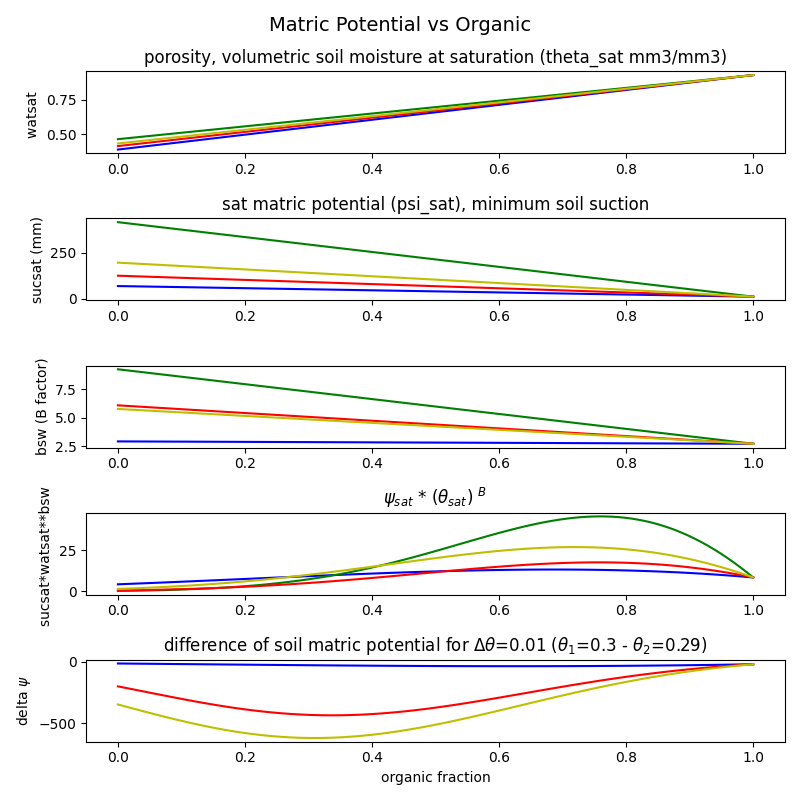

In [10]:
##2 look at organic effect on matric potential

ncol = 1
nrow = 5
fig1, ax1 = plt.subplots(nrow,ncol)
fig1.subplots_adjust(hspace=0.8)
fax = fig1.get_axes()

fig1.suptitle('Matric Potential vs Organic',fontsize=14)
wx = 8
wy = 8
fig1.set_size_inches([wx,wy])

sand1 = 80.
clay1 = 0.

clay2 = 60.
sand2 = 100. - clay2
clay2 = 40.
sand2 = 20.

clay3 = 20.
sand3 = 60.  

clay4 = 18.
sand4 = 45.

bsw1 = 2.91+0.159*clay1
phi1 = 0.489-0.00126*sand1
psi1 = 10.*10**(1.88-0.0131*sand1)

bsw2 = 2.91+0.159*clay2
phi2 = 0.489-0.00126*sand2
psi2 = 10.*10**(1.88-0.0131*sand2)

bsw3 = 2.91+0.159*clay3
phi3 = 0.489-0.00126*sand3
psi3 = 10.*10**(1.88-0.0131*sand3)

bsw4 = 2.91+0.159*clay4
phi4 = 0.489-0.00126*sand4
psi4 = 10.*10**(1.88-0.0131*sand4)


print(bsw1,phi1,psi1)
print(bsw2,phi2,psi2)
print(bsw3,phi3,psi3)
print(bsw4,phi4,psi4)
print(' ')

#  ----------  first plot -------------------------

xmax = 0.5
xtitl  = 'organic fraction'

xr = [0,xmax]

ymax = 15.
ymin = 0.
ymax2 = 5.e3
ymin2 = 1.e1

fax[4].set_xlabel(xtitl)


km = 100
om_frac = np.linspace(0,1,km)

om_watsat         = 0.93
om_b              = 2.7
om_sucsat         = 10.3

phiarr = [phi1,phi2,phi3,phi4]
psiarr = [psi1,psi2,psi3,psi4]
bswarr = [bsw1,bsw2,bsw3,bsw4]

theta = 0.3
dtheta = 0.01

cols = ['b','g','r','y']
for n in range(len(phiarr)):
    phi =  ( (1. - om_frac) * phiarr[n] + om_watsat*om_frac )
    bsw =  ( (1.-om_frac) * bswarr[n] + om_frac*om_b )
    psi =  ( (1.-om_frac) * psiarr[n] + om_sucsat*om_frac )

    # show saturated matric potential
    fax[0].plot(om_frac,phi,c=cols[n])
    fax[1].plot(om_frac,psi,c=cols[n])
    fax[2].plot(om_frac,bsw,c=cols[n])
    fax[3].plot(om_frac,psi*phi**bsw,c=cols[n])
    psia = psi*(theta/phi)**(-bsw)
    psib = psi*((theta-dtheta)/phi)**(-bsw)
    if n != 1: # exclude high clay line
        fax[4].plot(om_frac,psia-psib,c=cols[n])

fax[0].set_ylabel('watsat ')
fax[0].set_title('porosity, volumetric soil moisture at saturation (theta_sat mm3/mm3)')

fax[1].set_ylabel('sucsat (mm)')
fax[1].set_title('sat matric potential (psi_sat), minimum soil suction')
fax[2].set_ylabel('bsw (B factor)')
fax[3].set_ylabel('sucsat*watsat**bsw ')
fax[3].set_title('$\psi_{sat}$ * ($\\theta_{sat}$) $^{B}$')

fax[4].set_ylabel('delta $\psi$')
fax[4].set_title('difference of soil matric potential for $\Delta$$\\theta$=0.01 ($\\theta_1$='+str(theta)+' - $\\theta_2$='+str(theta-dtheta)+')')

fig1.tight_layout()
pngfile = 'mp_vs_o.png'
plt.savefig(pngfile,format='png')
print(pngfile,' created')


2.91 0.3882 67.92036326171842
9.27 0.4638 414.95404263436285
6.09 0.4134 124.16523075924106
5.772 0.4323 195.2090734043304
 
mp_nonr_vs_o.png  created


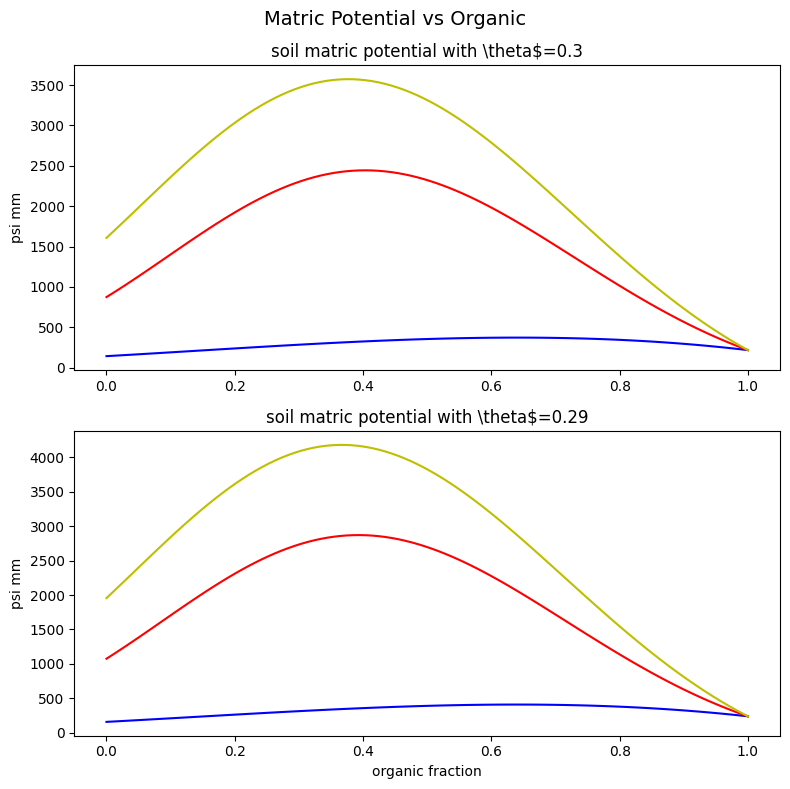

In [4]:
##2 look at organic effect on matric potential

ncol = 1
nrow = 2
fig1, ax1 = plt.subplots(nrow,ncol)
fig1.subplots_adjust(hspace=0.8)
fax = fig1.get_axes()

fig1.suptitle('Matric Potential vs Organic',fontsize=14)
wx = 8
wy = 8
fig1.set_size_inches([wx,wy])

sand1 = 80.
clay1 = 0.

clay2 = 60.
sand2 = 100. - clay2
clay2 = 40.
sand2 = 20.

clay3 = 20.
sand3 = 60.  

clay4 = 18.
sand4 = 45.

bsw1 = 2.91+0.159*clay1
phi1 = 0.489-0.00126*sand1
psi1 = 10.*10**(1.88-0.0131*sand1)

bsw2 = 2.91+0.159*clay2
phi2 = 0.489-0.00126*sand2
psi2 = 10.*10**(1.88-0.0131*sand2)

bsw3 = 2.91+0.159*clay3
phi3 = 0.489-0.00126*sand3
psi3 = 10.*10**(1.88-0.0131*sand3)

bsw4 = 2.91+0.159*clay4
phi4 = 0.489-0.00126*sand4
psi4 = 10.*10**(1.88-0.0131*sand4)


print(bsw1,phi1,psi1)
print(bsw2,phi2,psi2)
print(bsw3,phi3,psi3)
print(bsw4,phi4,psi4)
print(' ')

#  ----------  first plot -------------------------

xmax = 0.5
xtitl  = 'organic fraction'

xr = [0,xmax]

ymax = 15.
ymin = 0.
ymax2 = 5.e3
ymin2 = 1.e1

fax[1].set_xlabel(xtitl)


km = 100
om_frac = np.linspace(0,1,km)

om_watsat         = 0.93
om_b              = 2.7
om_sucsat         = 10.3

phiarr = [phi1,phi2,phi3,phi4]
psiarr = [psi1,psi2,psi3,psi4]
bswarr = [bsw1,bsw2,bsw3,bsw4]

theta = 0.3
dtheta = 0.01

cols = ['b','g','r','y']
for n in range(len(phiarr)):
    phi =  ( (1. - om_frac) * phiarr[n] + om_watsat*om_frac )
    bsw =  ( (1.-om_frac) * bswarr[n] + om_frac*om_b )
    psi =  ( (1.-om_frac) * psiarr[n] + om_sucsat*om_frac )

    # show saturated matric potential

    psia = psi*(theta/phi)**(-bsw)
    psib = psi*((theta-dtheta)/phi)**(-bsw)
    if n != 1: # exclude high clay line
        fax[0].plot(om_frac,psia,c=cols[n])
        fax[1].plot(om_frac,psib,c=cols[n])

fax[0].set_ylabel('psi mm')
fax[0].set_title('soil matric potential with \\theta$=0.3')
fax[1].set_ylabel('psi mm')
fax[1].set_title('soil matric potential with \\theta$=0.29')




fig1.tight_layout()
pngfile = 'mp_nonr_vs_o.png'
plt.savefig(pngfile,format='png')
print(pngfile,' created')


2.91 0.3882 67.92036326171842
9.27 0.4638 414.95404263436285
6.09 0.4134 124.16523075924106
5.772 0.4323 195.2090734043304
 


/tmp/ipykernel_18709/3969439707.py:97: RuntimeWarning: divide by zero encountered in power
  psia = psi*(theta/phi)**(-bsw)
/tmp/ipykernel_18709/3969439707.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  fax[k].set_ylim([0,1e14])


mp_nonr_vs_o.png  created


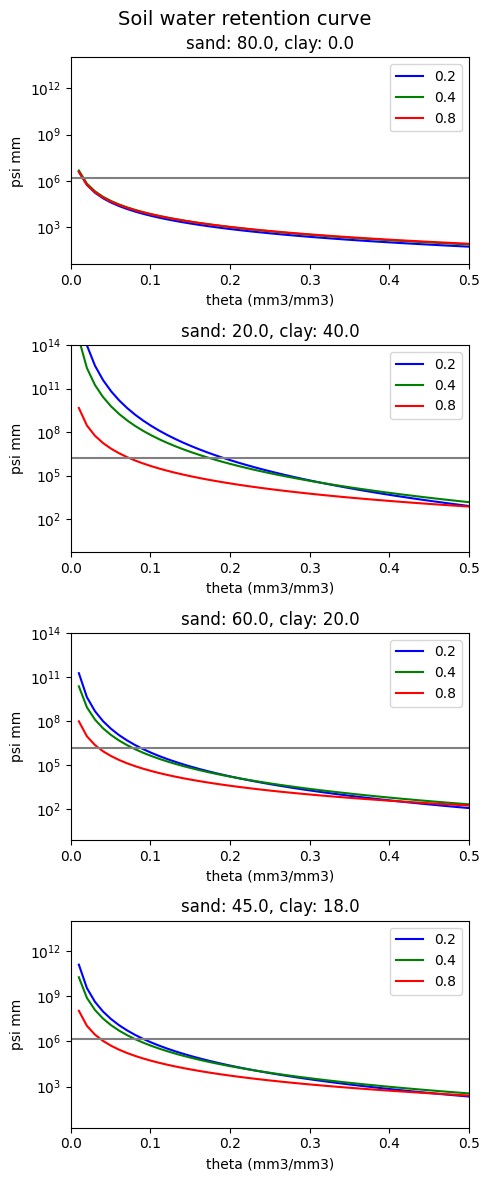

In [5]:
##2 look at organic effect on matric potential

wx = 8
wy = 8
fig1.set_size_inches([wx,wy])

sand1 = 80.
clay1 = 0.

clay2 = 60.
sand2 = 100. - clay2
clay2 = 40.
sand2 = 20.

clay3 = 20.
sand3 = 60.  

clay4 = 18.
sand4 = 45.

bsw1 = 2.91+0.159*clay1
phi1 = 0.489-0.00126*sand1
psi1 = 10.*10**(1.88-0.0131*sand1)

bsw2 = 2.91+0.159*clay2
phi2 = 0.489-0.00126*sand2
psi2 = 10.*10**(1.88-0.0131*sand2)

bsw3 = 2.91+0.159*clay3
phi3 = 0.489-0.00126*sand3
psi3 = 10.*10**(1.88-0.0131*sand3)

bsw4 = 2.91+0.159*clay4
phi4 = 0.489-0.00126*sand4
psi4 = 10.*10**(1.88-0.0131*sand4)


print(bsw1,phi1,psi1)
print(bsw2,phi2,psi2)
print(bsw3,phi3,psi3)
print(bsw4,phi4,psi4)
print(' ')

#  ----------  first plot -------------------------

xmax = 0.5
xtitl  = 'organic fraction'

xr = [0,xmax]

ymax = 15.
ymin = 0.
ymax2 = 5.e3
ymin2 = 1.e1

fax[1].set_xlabel(xtitl)



om_frac = [0.2,0.4,0.8]

#om_frac = np.linspace(0,1,km)
km = 100
theta = np.linspace(0,1,km)

om_watsat         = 0.93
om_b              = 2.7
om_sucsat         = 10.3

phiarr = [phi1,phi2,phi3,phi4]
psiarr = [psi1,psi2,psi3,psi4]
bswarr = [bsw1,bsw2,bsw3,bsw4]



cols = ['b','g','r','y']



ncol = 1
nrow = 2
fig1, ax1 = plt.subplots(len(phiarr),ncol, figsize=(5,12))
#fig1.subplots_adjust(hspace=0.8)
fax = fig1.get_axes()

fig1.suptitle('Soil water retention curve',fontsize=14)

for k in range(len(phiarr)):

    for n in range(len(om_frac)):
        phi =  ( (1. - om_frac[n]) * phiarr[k] + om_watsat*om_frac[n] )
        bsw =  ( (1.-om_frac[n]) * bswarr[k] + om_frac[n]*om_b )
        psi =  ( (1.-om_frac[n]) * psiarr[k] + om_sucsat*om_frac[n] )

        # show saturated matric potential

        psia = psi*(theta/phi)**(-bsw)

        fax[k].plot(theta,psia,c=cols[n])

    fax[k].set_ylabel('psi mm')
    fax[k].set_xlabel('theta (mm3/mm3)')
    fax[k].set_yscale('log')
    fax[0].set_title('sand: '+str(sand1)+', clay: '+str(clay1))
    fax[1].set_title('sand: '+str(sand2)+', clay: '+str(clay2))
    fax[2].set_title('sand: '+str(sand3)+', clay: '+str(clay3))
    fax[3].set_title('sand: '+str(sand4)+', clay: '+str(clay4))

    fax[k].axhline(1500000, color='gray', label='permanent wilting point')
    fax[k].set_xlim([theta[0],0.5])
    fax[k].set_ylim([0,1e14])

    fax[k].legend(om_frac)

fig1.tight_layout()
pngfile = 'mp_nonr_vs_o.png'
plt.savefig(pngfile,format='png')
print(pngfile,' created')


2.91 0.3882 67.92036326171842
9.27 0.4638 414.95404263436285
6.09 0.4134 124.16523075924106
5.772 0.4323 195.2090734043304
 


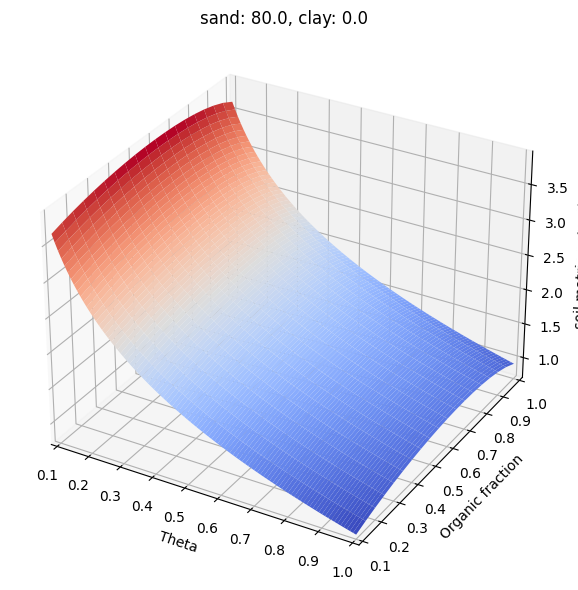

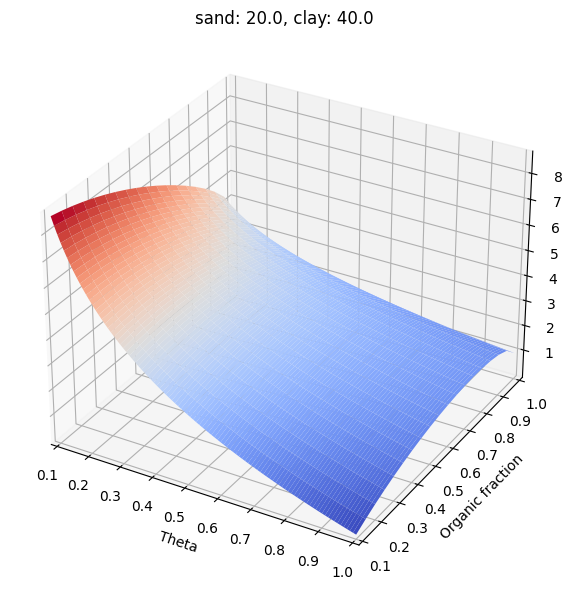

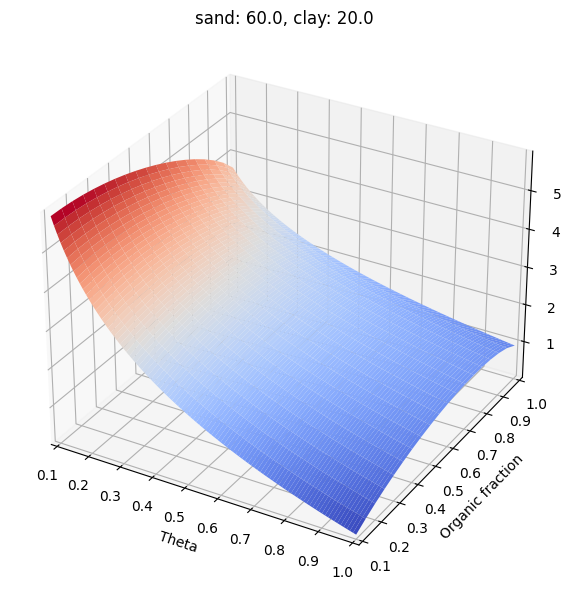

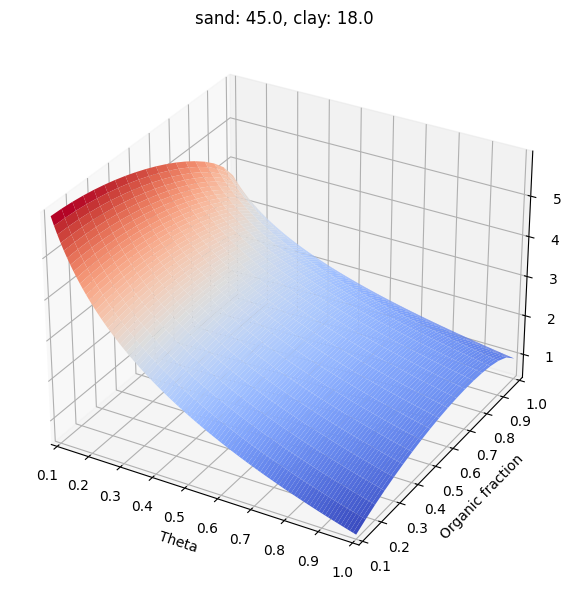

In [6]:



wx = 8
wy = 8
fig1.set_size_inches([wx,wy])

sand1 = 80.
clay1 = 0.

clay2 = 60.
sand2 = 100. - clay2
clay2 = 40.
sand2 = 20.

clay3 = 20.
sand3 = 60.  

clay4 = 18.
sand4 = 45.

bsw1 = 2.91+0.159*clay1
phi1 = 0.489-0.00126*sand1
psi1 = 10.*10**(1.88-0.0131*sand1)

bsw2 = 2.91+0.159*clay2
phi2 = 0.489-0.00126*sand2
psi2 = 10.*10**(1.88-0.0131*sand2)

bsw3 = 2.91+0.159*clay3
phi3 = 0.489-0.00126*sand3
psi3 = 10.*10**(1.88-0.0131*sand3)

bsw4 = 2.91+0.159*clay4
phi4 = 0.489-0.00126*sand4
psi4 = 10.*10**(1.88-0.0131*sand4)


print(bsw1,phi1,psi1)
print(bsw2,phi2,psi2)
print(bsw3,phi3,psi3)
print(bsw4,phi4,psi4)
print(' ')

#  ----------  first plot -------------------------

xmax = 0.5
xtitl  = 'organic fraction'

xr = [0,xmax]

ymax = 15.
ymin = 0.
ymax2 = 5.e3
ymin2 = 1.e1

fax[1].set_xlabel(xtitl)



om_frac = np.arange(0.1,1.05,0.05)

#om_frac = np.linspace(0,1,km)
km = 100
theta = np.linspace(0.1,1,km)

om_watsat         = 0.93
om_b              = 2.7
om_sucsat         = 10.3

phiarr = [phi1,phi2,phi3,phi4]
psiarr = [psi1,psi2,psi3,psi4]
bswarr = [bsw1,bsw2,bsw3,bsw4]

sandarr = [sand1,sand2,sand3,sand4]
clayarr = [clay1,clay2,clay3,clay4]
cols = ['b','g','r','y']



ncol = 1
nrow = 2




for k in range(len(phiarr)):

    phi =  ( (1. - om_frac) * phiarr[k] + om_watsat*om_frac )
    bsw =  ( (1.-om_frac) * bswarr[k] + om_frac*om_b )
    psi =  ( (1.-om_frac) * psiarr[k] + om_sucsat*om_frac )


    psia = np.empty([len(om_frac), len(theta)])
    # show saturated matric potential
    for n in range(0,len(theta)): 
        psia[:,n] = psi*(theta[n]/phi)**(-bsw)

    X, Y = np.meshgrid(theta,om_frac)
    Z = psia

    fig = plt.figure(figsize=(14,6))

    # set up the axes for the first plot
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y,  np.log10(Z), cmap=cm.coolwarm,
                           linewidth=0, rstride=1, cstride=1,)

    ax.set_ylabel('Organic fraction')
    ax.set_xlabel('Theta')
    ax.set_zlabel('soil matric potential')
    ax.set_zlabel('soil matric potential')
    #ax.set_zscale('log')
    ax.set_xlim(0.1,1)
    ax.set_ylim(0.1,1)
    ax.set_title('sand: '+str(sandarr[k])+', clay: '+str(clayarr[k]))

    fig.tight_layout(rect=[0,0,16,1]) 



2.91 0.3882 67.92036326171842
9.27 0.4638 414.95404263436285
6.09 0.4134 124.16523075924106
5.772 0.4323 195.2090734043304
 


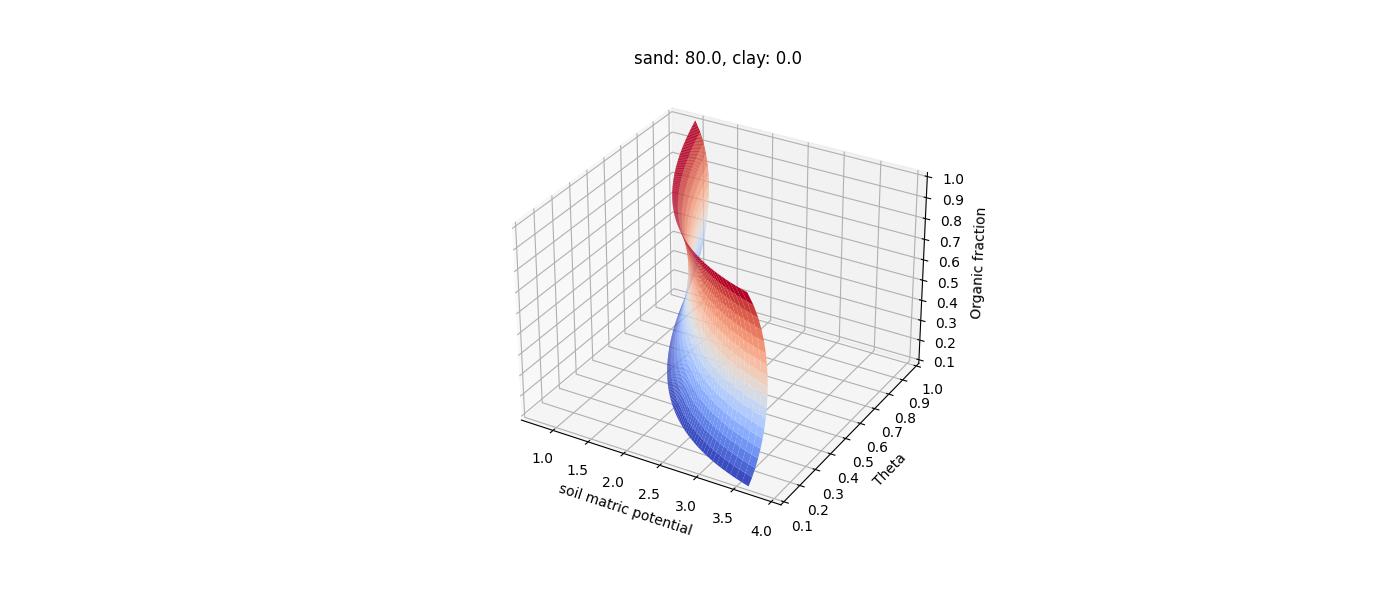

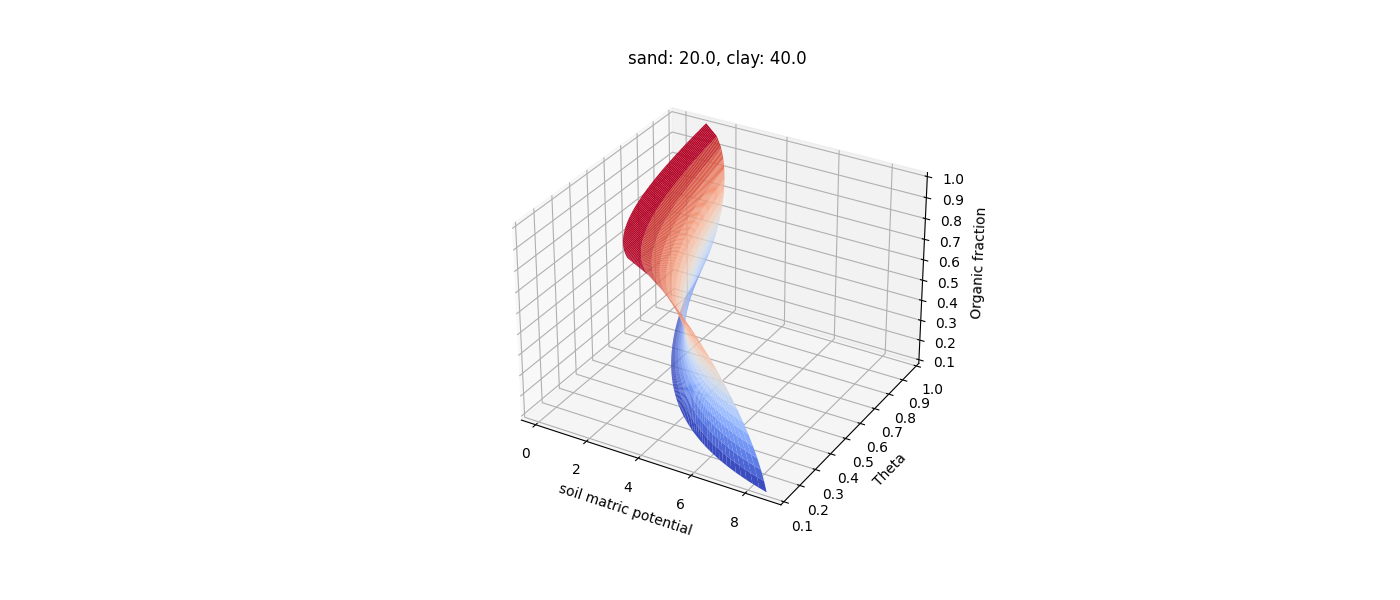

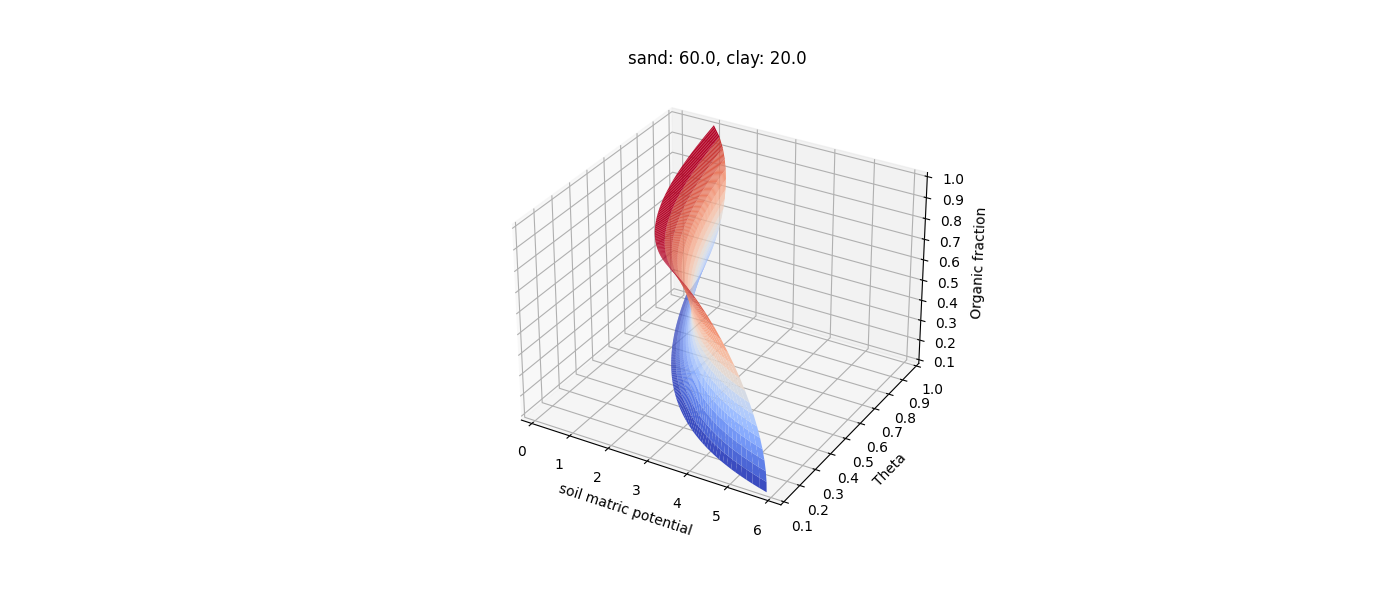

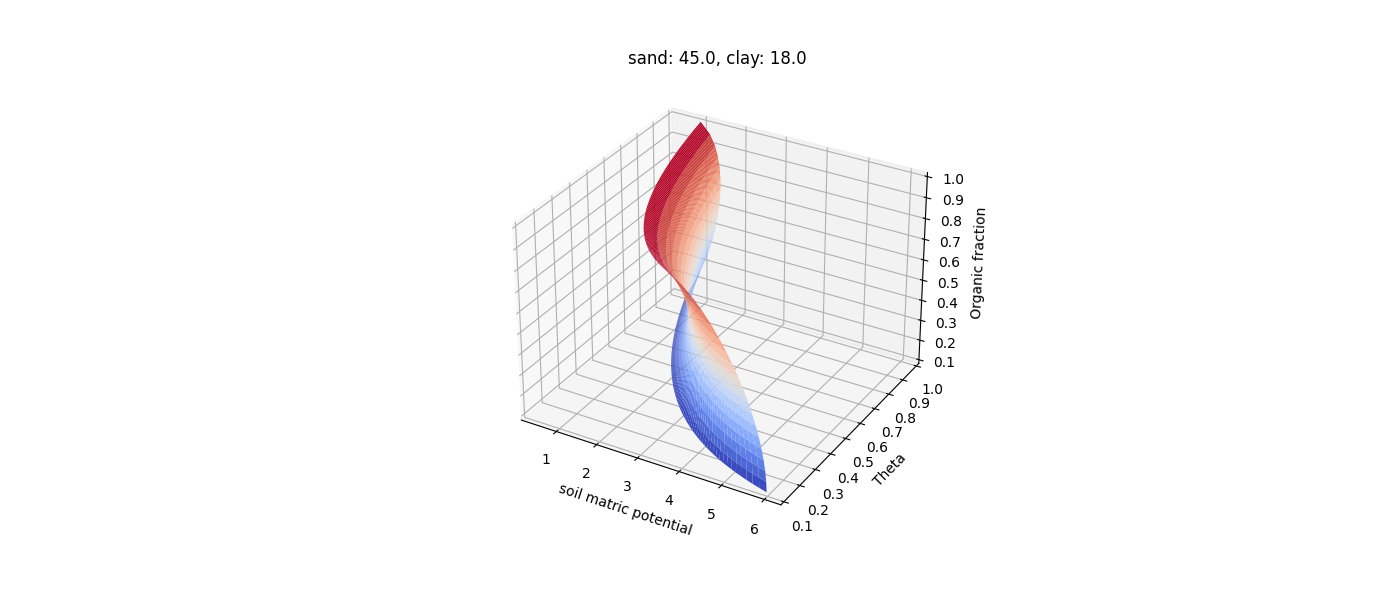

In [7]:
%matplotlib ipympl

##2 look at organic effect on matric potential
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


wx = 8
wy = 8
fig1.set_size_inches([wx,wy])

sand1 = 80.
clay1 = 0.

clay2 = 60.
sand2 = 100. - clay2
clay2 = 40.
sand2 = 20.

clay3 = 20.
sand3 = 60.  

clay4 = 18.
sand4 = 45.

bsw1 = 2.91+0.159*clay1
phi1 = 0.489-0.00126*sand1
psi1 = 10.*10**(1.88-0.0131*sand1)

bsw2 = 2.91+0.159*clay2
phi2 = 0.489-0.00126*sand2
psi2 = 10.*10**(1.88-0.0131*sand2)

bsw3 = 2.91+0.159*clay3
phi3 = 0.489-0.00126*sand3
psi3 = 10.*10**(1.88-0.0131*sand3)

bsw4 = 2.91+0.159*clay4
phi4 = 0.489-0.00126*sand4
psi4 = 10.*10**(1.88-0.0131*sand4)


print(bsw1,phi1,psi1)
print(bsw2,phi2,psi2)
print(bsw3,phi3,psi3)
print(bsw4,phi4,psi4)
print(' ')

#  ----------  first plot -------------------------

xmax = 0.5
xtitl  = 'organic fraction'

xr = [0,xmax]

ymax = 15.
ymin = 0.
ymax2 = 5.e3
ymin2 = 1.e1

fax[1].set_xlabel(xtitl)



om_frac = np.arange(0.1,1.05,0.05)

#om_frac = np.linspace(0,1,km)
km = 100
theta = np.linspace(0.1,1,km)

om_watsat         = 0.93
om_b              = 2.7
om_sucsat         = 10.3

phiarr = [phi1,phi2,phi3,phi4]
psiarr = [psi1,psi2,psi3,psi4]
bswarr = [bsw1,bsw2,bsw3,bsw4]

sandarr = [sand1,sand2,sand3,sand4]
clayarr = [clay1,clay2,clay3,clay4]
cols = ['b','g','r','y']



ncol = 1
nrow = 2




for k in range(len(phiarr)):

    phi =  ( (1. - om_frac) * phiarr[k] + om_watsat*om_frac )
    bsw =  ( (1.-om_frac) * bswarr[k] + om_frac*om_b )
    psi =  ( (1.-om_frac) * psiarr[k] + om_sucsat*om_frac )


    psia = np.empty([len(om_frac), len(theta)])
    # show saturated matric potential
    for n in range(0,len(theta)): 
        psia[:,n] = psi*(theta[n]/phi)**(-bsw)

    X, Y = np.meshgrid(theta,om_frac)
    Z = psia

    fig = plt.figure(figsize=(14,6))

    # set up the axes for the first plot
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(np.log10(Z), X,Y,  cmap=cm.coolwarm,
                           linewidth=0, rstride=1, cstride=1,)

    ax.set_zlabel('Organic fraction')
    ax.set_ylabel('Theta')
    ax.set_xlabel('soil matric potential')
    ax.set_ylim(0.1,1)
    ax.set_zlim(0.1,1)
    ax.set_title('sand: '+str(sandarr[k])+', clay: '+str(clayarr[k]))




In [8]:
import os
os.system('pip install ipywidgets')

# conda install -c conda-forge ipympl

0

## original python script

In [ ]:
# original python script

parser = argparse.ArgumentParser(description='...')
parser.add_argument("-f ","--fnum", help="plot type", nargs='?',type=int,default=1)
args = parser.parse_args()

#@
fnum = args.fnum

##1 look at organic effect on diffusivity
if fnum == 1:

    ncol = 1
    nrow = 1
    fig1, ax1 = plt.subplots(nrow,ncol)
    fig1.subplots_adjust(hspace=0.4,wspace=0.2)
    fax = fig1.get_axes()

    fig1.suptitle('Diffusivity vs Organic',fontsize=14)
    
    sand1 = 80.
    clay1 = 0.

    clay2 = 60.
    sand2 = 100. - clay2

    clay3 = 20.
    sand3 = 60.  

    clay4 = 18.
    sand4 = 45.

    bsw1 = 2.91+0.159*clay1
    phi1 = 0.489-0.00126*sand1
    psi1 = 10.*10**(1.88-0.0131*sand1)

    bsw2 = 2.91+0.159*clay2
    phi2 = 0.489-0.00126*sand2
    psi2 = 10.*10**(1.88-0.0131*sand2)

    bsw3 = 2.91+0.159*clay3
    phi3 = 0.489-0.00126*sand3
    psi3 = 10.*10**(1.88-0.0131*sand3)

    bsw4 = 2.91+0.159*clay4
    phi4 = 0.489-0.00126*sand4
    psi4 = 10.*10**(1.88-0.0131*sand4)


    print('bsw,phi,psi')
    print(bsw1,phi1,psi1)
    print(bsw2,phi2,psi2)
    print(bsw3,phi3,psi3)
    print(bsw4,phi4,psi4)
    print(' ')

    #  ----------  first plot -------------------------

    xmax = 0.5
    xtitl  = 'organic fraction'
    
    xr = [0,xmax]
    
    ymax = 15.
    ymin = 0.
    ymax2 = 5.e3
    ymin2 = 1.e1
    ytitl  = 'R'

    fax[0].set_xlabel(xtitl)
    fax[0].set_ylabel(ytitl)
    
    km = 100
    om_frac = np.linspace(0,1,km)

    om_watsat         = 0.93
    om_b              = 2.7
    om_sucsat         = 10.3

    phiarr = [phi1,phi2,phi3,phi4]
    psiarr = [psi1,psi2,psi3,psi4]
    bswarr = [bsw1,bsw2,bsw3,bsw4]

    cols = ['b','g','r','y']
    for n in range(len(phiarr)):
        phi =  ( (1. - om_frac) * phiarr[n] + om_watsat*om_frac )
        bsw =  ( (1.-om_frac) * bswarr[n] + om_frac*om_b )
        psi =  ( (1.-om_frac) * psiarr[n] + om_sucsat*om_frac )

        # convert to m
        if 1==2:
            psi = psi*1.e-3

        #  calculate field capacity and wilting point
        fc = phi1*(psi/3.4)**(1./bsw)

        psi_wp = 200.e3 #[mm]
        wp = phi1*(psi/psi_wp)**(1./bsw)

        #  "air-dry", dingman p. 237
        psi_air = 1.e4 * 1e3 #[mm]
        air = phi*(psi/psi_air)**(1./bsw)

        eps = phi-air

        tau = eps**2*(eps/phi)**(3./bsw)   

        tc = 15.
        t0 = 273.15+tc
        d0 = 2.26e-5*(t0/273.15)**1.75

        dg = tau*d0

        r = 1/(dg*eps*1.e3) + 20.
        fax[0].plot(om_frac,r,c=cols[n])

    pngfile = 'd_vs_o.png'
    plt.savefig(pngfile,format='png')
    print(pngfile,' created')

##2 look at organic effect on matric potential
if fnum == 2:

    ncol = 1
    nrow = 5
    fig1, ax1 = plt.subplots(nrow,ncol)
    fig1.subplots_adjust(hspace=0.5)
    fax = fig1.get_axes()

    fig1.suptitle('Matric Potential vs Organic',fontsize=14)
    wx = 8
    wy = 8
    fig1.set_size_inches([wx,wy])
    
    sand1 = 80.
    clay1 = 0.

    clay2 = 60.
    sand2 = 100. - clay2
    clay2 = 40.
    sand2 = 20.

    clay3 = 20.
    sand3 = 60.  

    clay4 = 18.
    sand4 = 45.

    bsw1 = 2.91+0.159*clay1
    phi1 = 0.489-0.00126*sand1
    psi1 = 10.*10**(1.88-0.0131*sand1)

    bsw2 = 2.91+0.159*clay2
    phi2 = 0.489-0.00126*sand2
    psi2 = 10.*10**(1.88-0.0131*sand2)

    bsw3 = 2.91+0.159*clay3
    phi3 = 0.489-0.00126*sand3
    psi3 = 10.*10**(1.88-0.0131*sand3)

    bsw4 = 2.91+0.159*clay4
    phi4 = 0.489-0.00126*sand4
    psi4 = 10.*10**(1.88-0.0131*sand4)


    print(bsw1,phi1,psi1)
    print(bsw2,phi2,psi2)
    print(bsw3,phi3,psi3)
    print(bsw4,phi4,psi4)
    print(' ')

    #  ----------  first plot -------------------------

    xmax = 0.5
    xtitl  = 'organic fraction'
    
    xr = [0,xmax]
    
    ymax = 15.
    ymin = 0.
    ymax2 = 5.e3
    ymin2 = 1.e1

    for sax in fax:
        sax.set_xlabel(xtitl)

    
    km = 100
    om_frac = np.linspace(0,1,km)

    om_watsat         = 0.93
    om_b              = 2.7
    om_sucsat         = 10.3
    
    phiarr = [phi1,phi2,phi3,phi4]
    psiarr = [psi1,psi2,psi3,psi4]
    bswarr = [bsw1,bsw2,bsw3,bsw4]

    theta = 0.3
    dtheta = 0.01
    
    cols = ['b','g','r','y']
    for n in range(len(phiarr)):
        phi =  ( (1. - om_frac) * phiarr[n] + om_watsat*om_frac )
        bsw =  ( (1.-om_frac) * bswarr[n] + om_frac*om_b )
        psi =  ( (1.-om_frac) * psiarr[n] + om_sucsat*om_frac )
    
        # show saturated matric potential
        fax[0].plot(om_frac,phi,c=cols[n])
        fax[1].plot(om_frac,psi,c=cols[n])
        fax[2].plot(om_frac,bsw,c=cols[n])
        fax[3].plot(om_frac,psi*phi**bsw,c=cols[n])
        psia = psi*(theta/phi)**(-bsw)
        psib = psi*((theta-dtheta)/phi)**(-bsw)
        if n != 1: # exclude high clay line
            fax[4].plot(om_frac,psia-psib,c=cols[n])

    fax[0].set_ylabel('watsat')
    fax[1].set_ylabel('sucsat')
    fax[2].set_ylabel('bsw')
    fax[3].set_ylabel('sucsat*watsat**bsw')
    fax[4].set_ylabel('delta psi')
    
    pngfile = 'mp_vs_o.png'
    plt.savefig(pngfile,format='png')
    print(pngfile,' created')


In [ ]:
# original python script

parser = argparse.ArgumentParser(description='...')
parser.add_argument("-f ","--fnum", help="plot type", nargs='?',type=int,default=1)
args = parser.parse_args()

#@
fnum = args.fnum

##1 look at organic effect on diffusivity
if fnum == 1:

    ncol = 1
    nrow = 1
    fig1, ax1 = plt.subplots(nrow,ncol)
    fig1.subplots_adjust(hspace=0.4,wspace=0.2)
    fax = fig1.get_axes()

    fig1.suptitle('Diffusivity vs Organic',fontsize=14)
    
    sand1 = 80.
    clay1 = 0.

    clay2 = 60.
    sand2 = 100. - clay2

    clay3 = 20.
    sand3 = 60.  

    clay4 = 18.
    sand4 = 45.

    bsw1 = 2.91+0.159*clay1
    phi1 = 0.489-0.00126*sand1
    psi1 = 10.*10**(1.88-0.0131*sand1)

    bsw2 = 2.91+0.159*clay2
    phi2 = 0.489-0.00126*sand2
    psi2 = 10.*10**(1.88-0.0131*sand2)

    bsw3 = 2.91+0.159*clay3
    phi3 = 0.489-0.00126*sand3
    psi3 = 10.*10**(1.88-0.0131*sand3)

    bsw4 = 2.91+0.159*clay4
    phi4 = 0.489-0.00126*sand4
    psi4 = 10.*10**(1.88-0.0131*sand4)


    print('bsw,phi,psi')
    print(bsw1,phi1,psi1)
    print(bsw2,phi2,psi2)
    print(bsw3,phi3,psi3)
    print(bsw4,phi4,psi4)
    print(' ')

    #  ----------  first plot -------------------------

    xmax = 0.5
    xtitl  = 'organic fraction'
    
    xr = [0,xmax]
    
    ymax = 15.
    ymin = 0.
    ymax2 = 5.e3
    ymin2 = 1.e1
    ytitl  = 'R'

    fax[0].set_xlabel(xtitl)
    fax[0].set_ylabel(ytitl)
    
    km = 100
    om_frac = np.linspace(0,1,km)

    om_watsat         = 0.93
    om_b              = 2.7
    om_sucsat         = 10.3

    phiarr = [phi1,phi2,phi3,phi4]
    psiarr = [psi1,psi2,psi3,psi4]
    bswarr = [bsw1,bsw2,bsw3,bsw4]

    cols = ['b','g','r','y']
    for n in range(len(phiarr)):
        phi =  ( (1. - om_frac) * phiarr[n] + om_watsat*om_frac )
        bsw =  ( (1.-om_frac) * bswarr[n] + om_frac*om_b )
        psi =  ( (1.-om_frac) * psiarr[n] + om_sucsat*om_frac )

        # convert to m
        if 1==2:
            psi = psi*1.e-3

        #  calculate field capacity and wilting point
        fc = phi1*(psi/3.4)**(1./bsw)

        psi_wp = 200.e3 #[mm]
        wp = phi1*(psi/psi_wp)**(1./bsw)

        #  "air-dry", dingman p. 237
        psi_air = 1.e4 * 1e3 #[mm]
        air = phi*(psi/psi_air)**(1./bsw)

        eps = phi-air

        tau = eps**2*(eps/phi)**(3./bsw)   

        tc = 15.
        t0 = 273.15+tc
        d0 = 2.26e-5*(t0/273.15)**1.75

        dg = tau*d0

        r = 1/(dg*eps*1.e3) + 20.
        fax[0].plot(om_frac,r,c=cols[n])

    pngfile = 'd_vs_o.png'
    plt.savefig(pngfile,format='png')
    print(pngfile,' created')

##2 look at organic effect on matric potential
if fnum == 2:

    ncol = 1
    nrow = 5
    fig1, ax1 = plt.subplots(nrow,ncol)
    fig1.subplots_adjust(hspace=0.5)
    fax = fig1.get_axes()

    fig1.suptitle('Matric Potential vs Organic',fontsize=14)
    wx = 8
    wy = 8
    fig1.set_size_inches([wx,wy])
    
    sand1 = 80.
    clay1 = 0.

    clay2 = 60.
    sand2 = 100. - clay2
    clay2 = 40.
    sand2 = 20.

    clay3 = 20.
    sand3 = 60.  

    clay4 = 18.
    sand4 = 45.

    bsw1 = 2.91+0.159*clay1
    phi1 = 0.489-0.00126*sand1
    psi1 = 10.*10**(1.88-0.0131*sand1)

    bsw2 = 2.91+0.159*clay2
    phi2 = 0.489-0.00126*sand2
    psi2 = 10.*10**(1.88-0.0131*sand2)

    bsw3 = 2.91+0.159*clay3
    phi3 = 0.489-0.00126*sand3
    psi3 = 10.*10**(1.88-0.0131*sand3)

    bsw4 = 2.91+0.159*clay4
    phi4 = 0.489-0.00126*sand4
    psi4 = 10.*10**(1.88-0.0131*sand4)


    print(bsw1,phi1,psi1)
    print(bsw2,phi2,psi2)
    print(bsw3,phi3,psi3)
    print(bsw4,phi4,psi4)
    print(' ')

    #  ----------  first plot -------------------------

    xmax = 0.5
    xtitl  = 'organic fraction'
    
    xr = [0,xmax]
    
    ymax = 15.
    ymin = 0.
    ymax2 = 5.e3
    ymin2 = 1.e1

    for sax in fax:
        sax.set_xlabel(xtitl)

    
    km = 100
    om_frac = np.linspace(0,1,km)

    om_watsat         = 0.93
    om_b              = 2.7
    om_sucsat         = 10.3
    
    phiarr = [phi1,phi2,phi3,phi4]
    psiarr = [psi1,psi2,psi3,psi4]
    bswarr = [bsw1,bsw2,bsw3,bsw4]

    theta = 0.3
    dtheta = 0.01
    
    cols = ['b','g','r','y']
    for n in range(len(phiarr)):
        phi =  ( (1. - om_frac) * phiarr[n] + om_watsat*om_frac )
        bsw =  ( (1.-om_frac) * bswarr[n] + om_frac*om_b )
        psi =  ( (1.-om_frac) * psiarr[n] + om_sucsat*om_frac )
    
        # show saturated matric potential
        fax[0].plot(om_frac,phi,c=cols[n])
        fax[1].plot(om_frac,psi,c=cols[n])
        fax[2].plot(om_frac,bsw,c=cols[n])
        fax[3].plot(om_frac,psi*phi**bsw,c=cols[n])
        psia = psi*(theta/phi)**(-bsw)
        psib = psi*((theta-dtheta)/phi)**(-bsw)
        if n != 1: # exclude high clay line
            fax[4].plot(om_frac,psia-psib,c=cols[n])

    fax[0].set_ylabel('watsat')
    fax[1].set_ylabel('sucsat')
    fax[2].set_ylabel('bsw')
    fax[3].set_ylabel('sucsat*watsat**bsw')
    fax[4].set_ylabel('delta psi')
    
    pngfile = 'mp_vs_o.png'
    plt.savefig(pngfile,format='png')
    print(pngfile,' created')
